In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [32]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


<Axes: xlabel='X', ylabel='Y'>

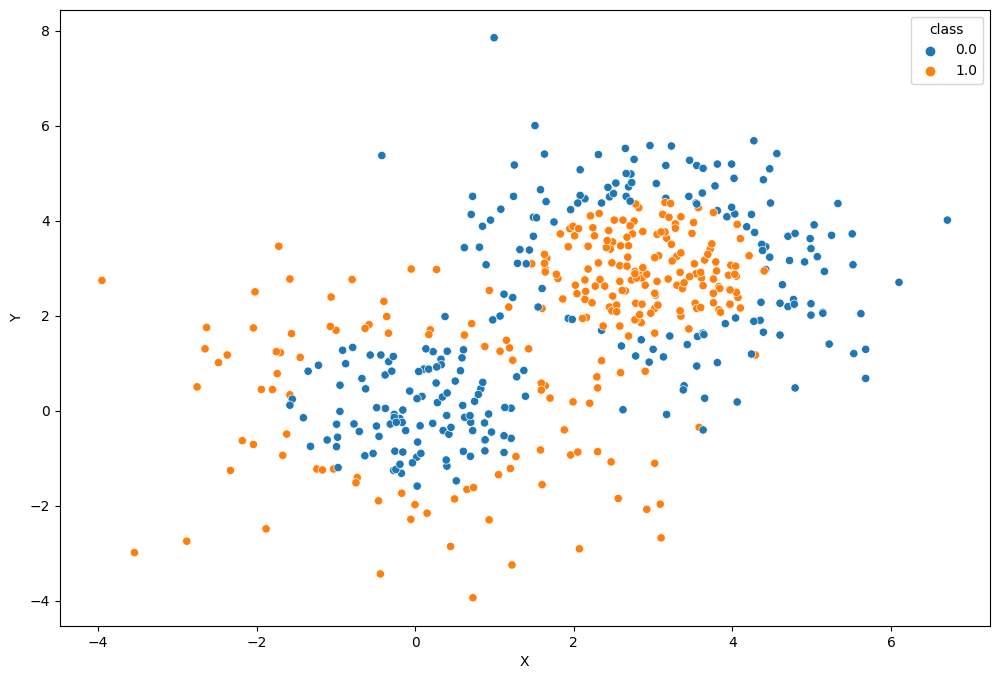

In [33]:
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class'])

**Задание 1.** 
Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. 
- Как линейный классификатор справился с задачей? 
- Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Определяем X и Y для обучения Y это целевая переменная
X = circ[['X', 'Y']].values # circ is a dataframe
y = circ['class'].values.astype('int') # .values надо использовать для того чтобы получить массив numpy

# Создаем модель логистической регрессии
clf = LogisticRegression() # clf stands for classifier
clf.fit(X, y)

# Предсказываем значения для тестовой выборки
Y_PRED = clf.predict(X)

# Считаем точность
print('Точность модели: ', clf.score(X, y))



Точность модели:  0.424


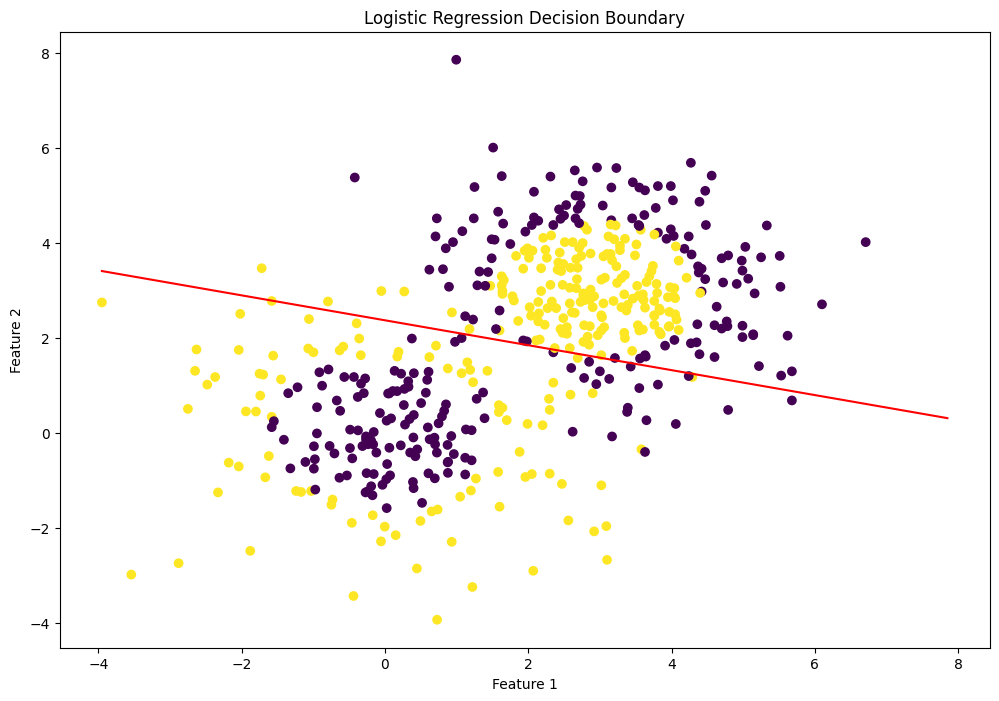

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Предполагая, что X и y содержат ваши данные
plt.scatter(X[:, 0], X[:, 1], c=y)

coef = clf.coef_[0]
intercept = clf.intercept_[0]

x_boundary = np.linspace(X.min(), X.max(), 100)
y_boundary = -(coef[0] * x_boundary + intercept) / coef[1]

plt.plot(x_boundary, y_boundary, color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [36]:
# Перезаписываем X и Y для обучения
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Определяем массив с количеством соседей
all_k = [1, 3, 10, 30, 40, 60]

# Создаём модель KNN
KNN = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)

# Создаём луп для обучения модели с разным количеством соседей
for k in all_k:
    KNN.n_neighbors = k
    KNN.fit(X_train, y_train)
    print('Точность модели при k = {}: {}'.format(k, KNN.score(X_test, y_test)))


Точность модели при k = 1: 0.89
Точность модели при k = 3: 0.87
Точность модели при k = 10: 0.85
Точность модели при k = 30: 0.74
Точность модели при k = 40: 0.75
Точность модели при k = 60: 0.73


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [39]:
import numpy as np
import matplotlib.gridspec as gridspec
import itertools
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split


Точность модели KNN-1: 0.89
Точность модели KNN-3: 0.87
Точность модели KNN-10: 0.85
Точность модели KNN-30: 0.74


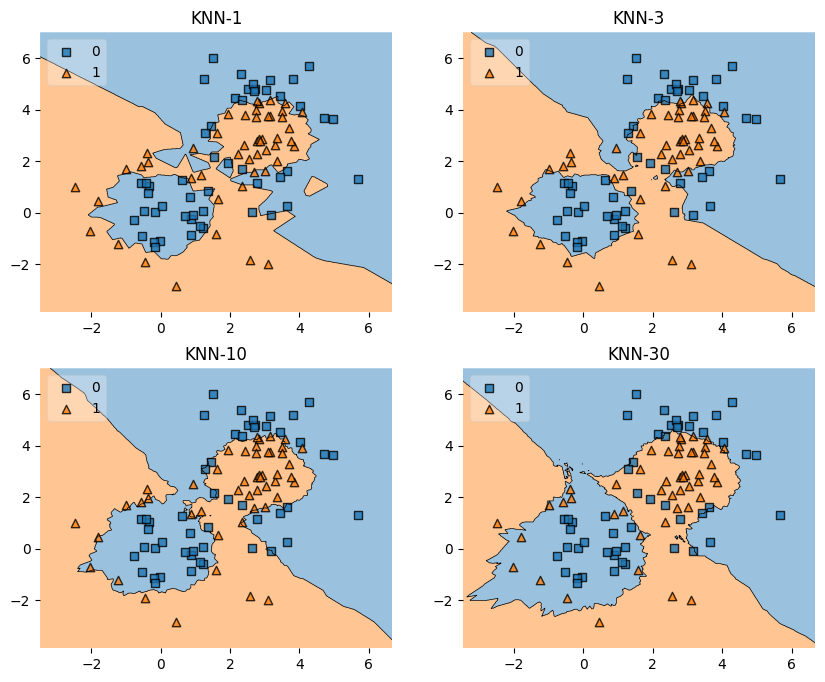

In [40]:
# Initialize classifiers with different numbers of neighbors
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = KNeighborsClassifier(n_neighbors=10)
clf4 = KNeighborsClassifier(n_neighbors=30)

# Set up the grid for subplots
gs = gridspec.GridSpec(2, 2)

# Create the figure for subplots
fig = plt.figure(figsize=(10, 8))

# Define classifier labels
labels = ['KNN-1', 'KNN-3', 'KNN-10', 'KNN-30']

# Loop through classifiers, train, and plot their decision regions
for clf, lab, grd in zip([clf1, clf2, clf3, clf4], labels, itertools.product([0, 1], repeat=2)):

    # Train the classifier
    clf.fit(X_train, y_train)

    # Create a subplot for the current classifier
    ax = plt.subplot(gs[grd[0], grd[1]])
    
    # Plot the decision regions for the current classifier
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    
    # Set the title for the current subplot
    plt.title(lab)
    
    # Print accuracy score for the current classifier
    print('Точность модели {}: {}'.format(lab, clf.score(X_test, y_test)))

# Display the plot with all subplots
plt.show()


1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

Сделано на сервере:

```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('processed_sigma_cabs.csv')

X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

# Определяем массив с количеством соседей
all_k = [1, 5, 10]

# Создаём модель KNN
KNN = KNeighborsClassifier(n_neighbors=1)

# Создаём луп для обучения модели с разным количеством соседей
for k in all_k:
    KNN.n_neighbors = k
    KNN.fit(X_train, y_train)
    print('Точность модели при k = {}: {}'.format(k, KNN.score(X_test, y_test)))
```
**Решение**
Точность модели при k = 1: 0.43819542019519236
Точность модели при k = 5: 0.44317016671097104
Точность модели при k = 10: 0.4703603843086621

**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Заного разметим X и Y для обучения
X = circ[['X', 'Y']].values
Y = circ['class'].values.astype('int')

# Создаём пайплайн для KNN с скейлером данных и KNN во втором шаге
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=10, metric='minkowski', n_jobs=-1, p=1))])

# Обучаем модель
pipe.fit(X, Y)

# Предсказываем значения для тестовой выборки
y_pred = pipe.predict(X)

# Считаем точность
print('Точность модели: ', pipe.score(X, Y))

Точность модели:  0.928


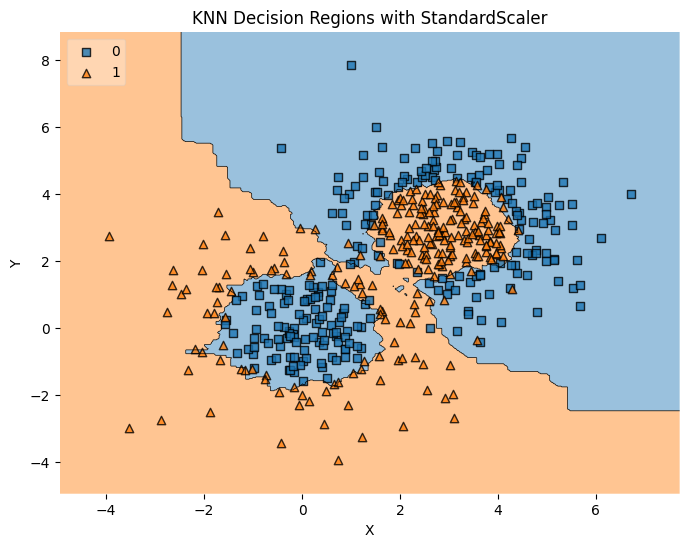

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Create a meshgrid for the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Plot the decision regions
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_regions(X, Y, clf=pipe, ax=ax, legend=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('KNN Decision Regions with StandardScaler')
plt.show()


Точность модели:  0.916


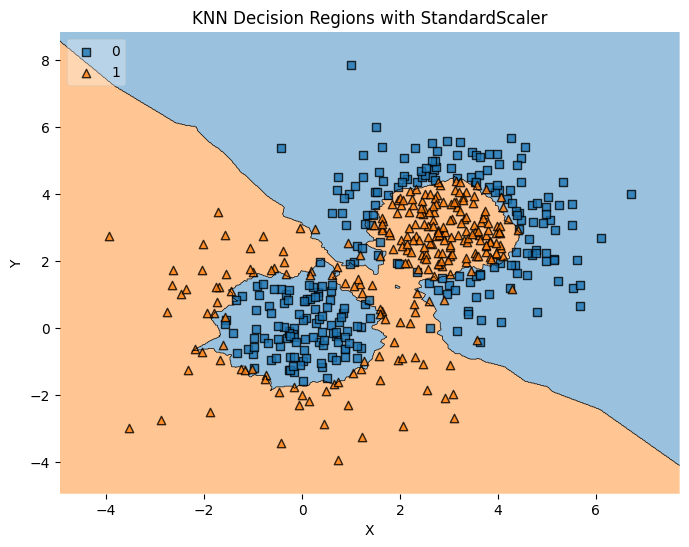

In [48]:
# Заного разметим X и Y для обучения
X = circ[['X', 'Y']].values
Y = circ['class'].values.astype('int')

# Создаём пайплайн для KNN с скейлером данных и KNN во втором шаге
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=10, metric='minkowski', n_jobs=-1, p=2))])

# Обучаем модель
pipe.fit(X, Y)

# Предсказываем значения для тестовой выборки
y_pred = pipe.predict(X)

# Считаем точность
print('Точность модели: ', pipe.score(X, Y))

# Create a meshgrid for the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Plot the decision regions
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_regions(X, Y, clf=pipe, ax=ax, legend=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('KNN Decision Regions with StandardScaler')
plt.show()

**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [49]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [52]:
# Info on the comumns of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


<Axes: xlabel='longitude', ylabel='latitude'>

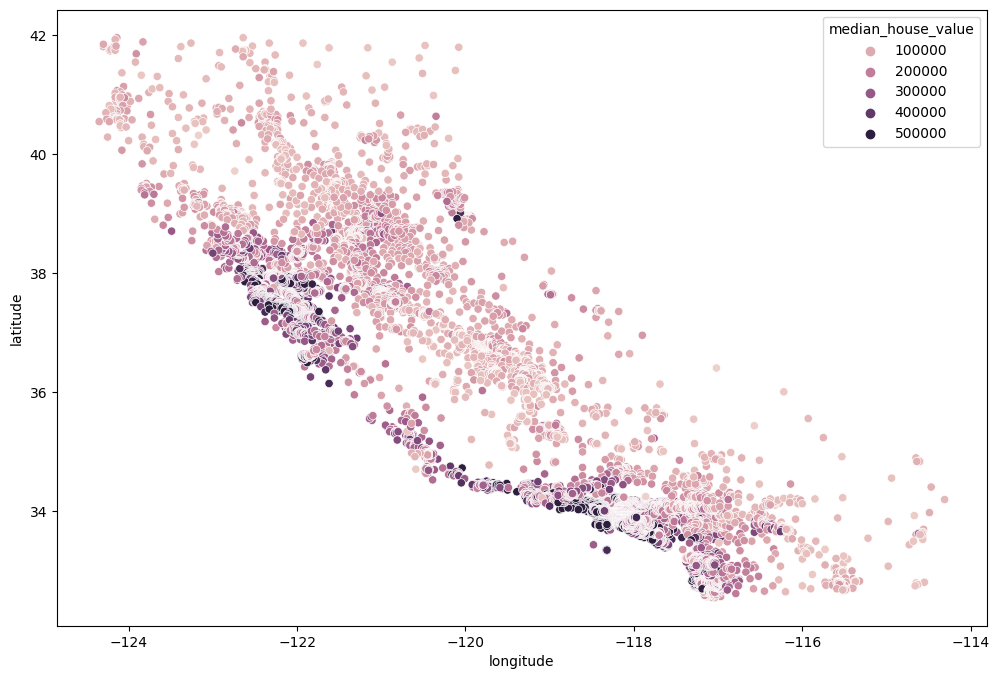

In [54]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df'
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2022)

plot_data = X.copy()
plot_data['median_house_value'] = y

sns.scatterplot(x='longitude', y='latitude', data=plot_data, hue='median_house_value')


1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.

In [68]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# One-Hot Encoding for the 'ocean_proximity' feature
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])

X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2022)

lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Calculate RMSE on the training and testing sets
print('RMSE на тренировочной выборке: ', np.sqrt(np.mean((lr.predict(X_train) - y_train)**2)))
print('RMSE на обучающей выборке: ', np.sqrt(np.mean((lr.predict(X_test) - y_test)**2)))

# Precision of the model
print('Точность модели: ', lr.score(X_test, y_test))


RMSE на тренировочной выборке:  68792.54755922253
RMSE на обучающей выборке:  68045.90616850436
Точность модели:  0.655906073318191


R-squared score: -3.18


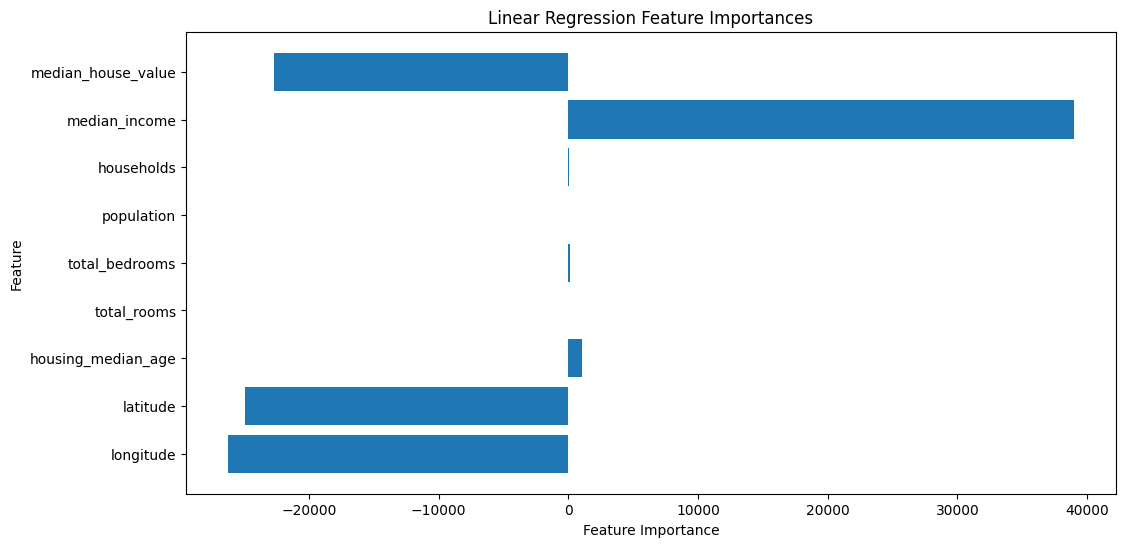

In [60]:
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

# Plot feature importances
# Since the one-hot encoded features are binary, it's better to use the original features' coefficients
# for this visualization.
coefs = lr.coef_[:len(df.columns) - 1]  # Excluding the one-hot encoded features
features = df.columns[:-1]  # Excluding the target variable 'median_house_value'

plt.figure(figsize=(12, 6))
plt.barh(features, coefs)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Linear Regression Feature Importances")
plt.show()


2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'df'

# One-Hot Encoding for the 'ocean_proximity' feature
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])

X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2022)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the kNN regressor model
knn = KNeighborsRegressor()

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': list(range(1, 10))}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Find the best hyperparameter
best_k = grid_search.best_params_['n_neighbors']
print(f"Лучшее значение k: {best_k}")

# Train the kNN regressor with the best hyperparameter on
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

# Predict values for the test set
y_pred_knn = best_knn.predict(X_test_scaled)

# Calculate the Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(np.mean((y_test - y_pred_knn)**2))
print(f"RMSE kNN регрессора: {rmse_knn:.2f}")

Лучшее значение k: 9
RMSE kNN регрессора: 60132.34


3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, RegressorMixin

X = df[['longitude', 'latitude']]
y = df['median_house_value']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

all_n = [1, 2, 3, 4, 5, 6, 7, 8, 9]

pipe_knn = Pipeline([('scaler', StandardScaler()), 
                      ('KNN', KNeighborsRegressor())])
for n in all_n:
    pipe_knn.set_params(KNN__n_neighbors=n)
    pipe_knn.fit(X_train, y_train)
    print(f'n={n} |  RMSE = {mean_squared_error(pipe_knn.predict(X_test), y_test, squared=False)}')

n=1 |  RMSE = 63027.27533732347
n=2 |  RMSE = 56468.60849051957
n=3 |  RMSE = 54828.72144560537
n=4 |  RMSE = 54132.97927977812
n=5 |  RMSE = 53588.10087375131
n=6 |  RMSE = 53268.69049582072
n=7 |  RMSE = 52851.70969778676
n=8 |  RMSE = 52956.361796046804
n=9 |  RMSE = 53090.00775552418


In [73]:
all_h = np.arange(0.02, 0.1, 0.01)

for h in all_h:
  def kernel(distances, h=h):
    
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
    
        return const * np.exp(power)
  knn = KNeighborsRegressor(n_neighbors=7, weights=kernel)
  
  knn.fit(X_train, y_train)
  print(f'h={round(h,3)} |  RMSE = {mean_squared_error(knn.predict(X_test), y_test, squared=False)}')

h=0.02 |  RMSE = 53243.79098132952
h=0.03 |  RMSE = 53105.53919526642
h=0.04 |  RMSE = 52975.071696869585
h=0.05 |  RMSE = 52887.50170453821
h=0.06 |  RMSE = 52843.0190181037
h=0.07 |  RMSE = 52820.8663174583
h=0.08 |  RMSE = 52805.90655130909
h=0.09 |  RMSE = 52791.673095607446
